In [2]:
import pandas as pd

In [3]:
# load the dataset
data = pd.read_csv('~/Documents/Raporty/Medium/Tesco_Stalowa_closed/tesco_users_data.csv', 
                   index_col='user_id')
data.head()

,Y,brands_visited,visits_n_beforeBiedronka,visits_n_beforeCarrefour,visits_n_beforeKaufland,visits_n_beforeLidl,visits_pct_beforeBiedronka,visits_pct_beforeCarrefour,visits_pct_beforeKaufland,visits_pct_beforeLidl,...,time_minBiedronka,time_minCarrefour,time_minKaufland,time_minLidl,time_minTesco,n_locationsBiedronka,n_locationsCarrefour,n_locationsKaufland,n_locationsLidl,n_locationsTesco
user_id,,,,,,,,,,,,,,,,,,,,,
502308,Lidl,4.0,3,0,0,16,0.150000,0.000000,0.000000,0.8,...,747.0,0.0,0.0,531.0,1019.0,2.0,0.0,0.0,2.0,1.0
511288,Lidl,4.0,1,0,46,0,0.018182,0.000000,0.836364,0.0,...,904.0,0.0,478.0,787.0,778.0,3.0,0.0,1.0,3.0,1.0
513284,Carrefour,2.0,0,10,0,0,0.000000,0.833333,0.000000,0.0,...,0.0,523.0,0.0,0.0,501.0,0.0,1.0,0.0,0.0,1.0
616687,Carrefour,4.0,0,2,2,0,0.000000,0.333333,0.333333,0.0,...,0.0,759.0,781.0,760.0,771.0,0.0,1.0,1.0,1.0,1.0
632801,Carrefour,2.0,0,1,0,0,0.000000,0.500000,0.000000,0.0,...,0.0,1073.0,0.0,0.0,1230.0,0.0,1.0,0.0,0.0,1.0


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data.iloc[:, 1:], data.Y,
                                                     test_size=0.3,
                                                      random_state=1)


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = Pipeline(steps = [('classfier', RandomForestClassifier(random_state=4))])
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_valid)
print( 'Accuracy: {}'.format(accuracy_score(y_valid, forest_preds)))

Accuracy: 0.8504672897196262


In [5]:
# draw the tree
from sklearn.tree import export_graphviz

export_graphviz(forest.steps[0][1].estimators_[5], out_file='tree1.dot', 
                feature_names = X_train.columns.values,
                class_names = list(y_train.unique()),
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [6]:
feature_importances = pd.DataFrame(forest.steps[0][1].feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)
feature_importances

,importance
visits_pct_afterBiedronka,0.139376
visits_pct_afterLidl,0.129614
visits_pct_afterCarrefour,0.109104
visits_pct_afterKaufland,0.061827
visits_n_afterLidl,0.060054
visits_n_afterBiedronka,0.051021
visits_n_afterKaufland,0.042202
visits_n_afterCarrefour,0.042022
time_minBiedronka,0.035038
visits_pct_beforeBiedronka,0.033333


In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(data.loc[:, feature_importances.index[:7]], data.Y,
                                                     test_size=0.3,
                                                      random_state=1)

In [8]:
forest = Pipeline(steps = [('classifier', RandomForestClassifier(n_estimators = 5, max_depth=3, 
                                                                bootstrap=False, random_state=4))])
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_valid)
print( 'Accuracy: {}'.format(accuracy_score(y_valid, forest_preds)))


Accuracy: 0.7523364485981309


In [19]:
# rysuj drzewo
export_graphviz(forest.steps[0][1].estimators_[3], out_file='tree2.dot', 
                feature_names = X_train.columns.values,
                class_names = ['Biedronka', 'Carrefour', 'Kaufland', 'Lidl'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


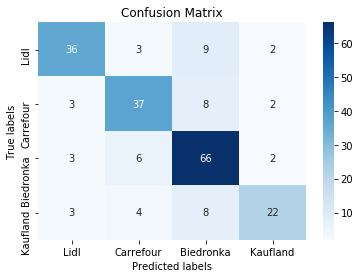

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_valid, forest_preds, labels=data.Y.unique())
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(data.Y.unique()); ax.yaxis.set_ticklabels(data.Y.unique());

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, forest_preds))

              precision    recall  f1-score   support

   Biedronka       0.73      0.86      0.79        77
   Carrefour       0.74      0.74      0.74        50
    Kaufland       0.79      0.59      0.68        37
        Lidl       0.80      0.72      0.76        50

    accuracy                           0.75       214
   macro avg       0.76      0.73      0.74       214
weighted avg       0.76      0.75      0.75       214

